In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data_lst.csv')
df.head()

,date,station,temperature,green,red,nir,swir1,swir2,lst
0,2023-08-21,4,33.1,3372,3491,3940,3871,3396,313.0
1,2023-08-21,8,32.6,2246,2173,4128,3315,2773,308.0
2,2023-08-21,16,32.0,2260,2304,4253,3144,2493,308.0
3,2023-08-21,18,32.7,1678,1650,4444,3377,2761,304.0
4,2023-08-21,24,31.9,3372,3746,4452,5077,4334,313.0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

/home/andres/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


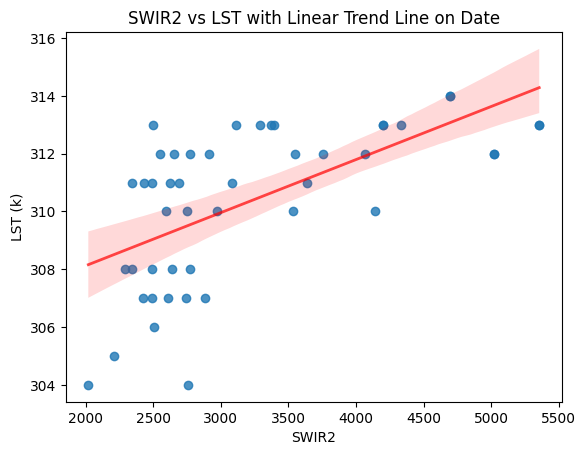

In [4]:
sns.regplot(x=df['swir2'], y=df['lst'], line_kws={'color':'r', 'alpha':0.7, 'lw':2})
plt.xlabel('SWIR2')
plt.ylabel('LST (k)')
plt.title('SWIR2 vs LST with Linear Trend Line on Date')
plt.show()

In [5]:
correlation, p_value = stats.pearsonr(df['swir2'], df['lst'])
print(f'Pearson correlation coefficient: {correlation}, p-value: {p_value}')

Pearson correlation coefficient: 0.616598420642176, p-value: 3.932762482920703e-06


In [6]:
correlation, p_value = stats.spearmanr(df['swir2'], df['lst'])
print(f'Spearman correlation coefficient: {correlation}, p-value: {p_value}')

Spearman correlation coefficient: 0.6722313821413081, p-value: 2.286901974883623e-07


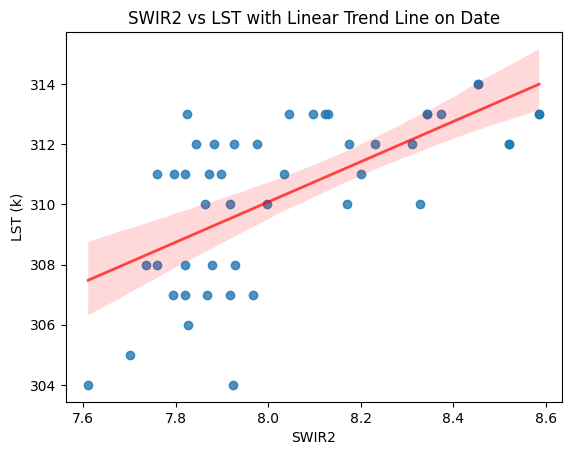

In [7]:
sns.regplot(x=np.log(df['swir2']), y=df['lst'], line_kws={'color':'r', 'alpha':0.7, 'lw':2})
plt.xlabel('SWIR2')
plt.ylabel('LST (k)')
plt.title('SWIR2 vs LST with Linear Trend Line on Date')
plt.show()

In [8]:
correlation, p_value = stats.pearsonr(np.log(df['swir2']), df['lst'])
print(f'Pearson correlation coefficient: {correlation}, p-value: {p_value}')

Pearson correlation coefficient: 0.64666391003545, p-value: 9.078841199902028e-07


In [9]:
# Same correlation coefficient got without np.log using Spearman
correlation, p_value = stats.spearmanr(np.log(df['swir2']), df['lst'])
print(f'Spearman correlation coefficient: {correlation}, p-value: {p_value}')

Spearman correlation coefficient: 0.6722313821413081, p-value: 2.286901974883623e-07


## NDVI VS LST

In [10]:
nir = df['nir']
red = df['red']
ndvi = (nir - red) / (nir + red)

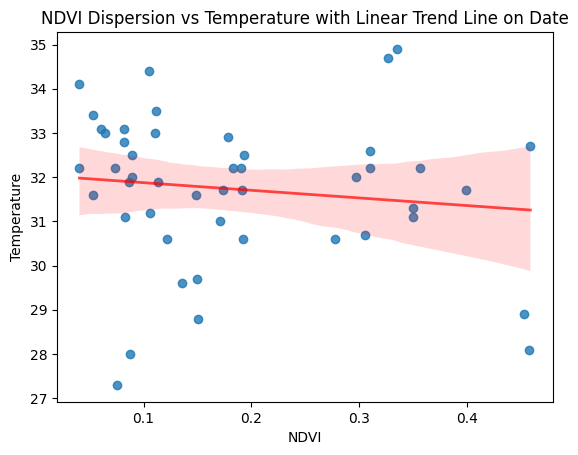

In [11]:
sns.regplot(x=ndvi, y=df['temperature'], line_kws={'color':'r', 'alpha':0.7, 'lw':2})
plt.xlabel('NDVI')
plt.ylabel('Temperature')
plt.title('NDVI Dispersion vs Temperature with Linear Trend Line on Date')
plt.show()

In [12]:
correlation, p_value = stats.spearmanr(ndvi, df['temperature'])
print(f'Spearman correlation coefficient: {correlation}, p-value: {p_value}')

Spearman correlation coefficient: -0.19957745421402825, p-value: 0.17863592208787496


## Full analysis

Instead of looking for a correlation with just the station pixels, try to use all the raster pixels.

In [13]:
import rasterio

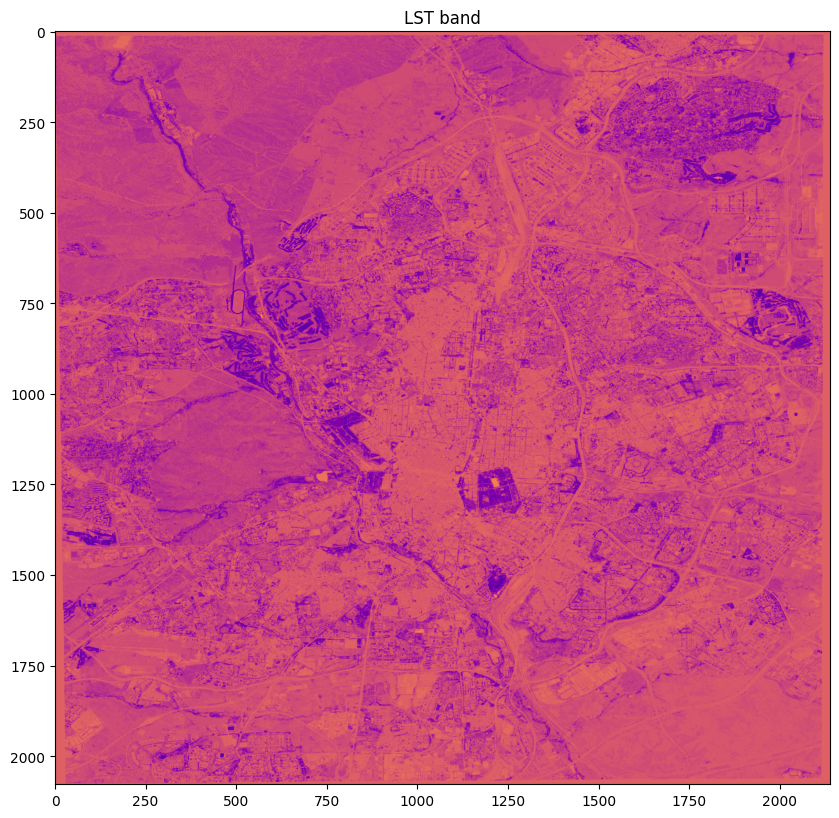

In [14]:
lst_path = './lst/LST_20230824T212144_StudyArea_downscaled.tif'
with rasterio.open(lst_path) as src:
    lst_no_data_value = src.nodata
    lst_band = src.read(1)

plt.figure(figsize=(10, 10))
plt.imshow(lst_band, cmap='plasma')
plt.title(f'LST band')
plt.show()

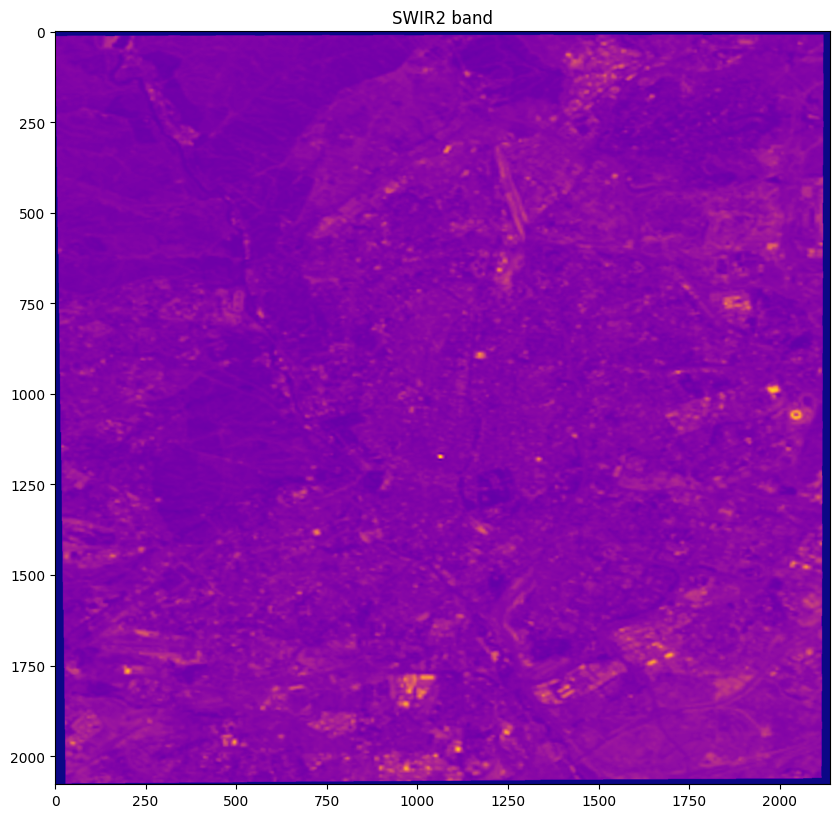

In [15]:
swir2_path = './sentinel/20230824T110619_StudyArea.tif'
with rasterio.open(swir2_path) as src:
    swir2_no_data_value = src.nodata
    swir2_band = src.read(1)

plt.figure(figsize=(10, 10))
plt.imshow(swir2_band, cmap='plasma')
plt.title(f'SWIR2 band')
plt.show()

In [16]:
swir2_band.shape

(2078, 2139)

In [17]:
lst_band.shape

(2078, 2139)

In [18]:
# Flatten the matrices to create 1D arrays
swir2_flat = swir2_band.flatten()
lst_flat = lst_band.flatten()

# Create a DataFrame
df = pd.DataFrame({
    'swir2': swir2_flat,
    'lst': lst_flat
})

print(df)

         swir2  lst
0           -1  314
1           -1  314
2           -1  314
3           -1  314
4           -1  314
...        ...  ...
4444837     -1  314
4444838     -1  314
4444839     -1  314
4444840     -1  314
4444841     -1  314

[4444842 rows x 2 columns]


In [19]:
df_filtered = df[df['swir2'] != -1]
df_filtered.shape

(4327517, 2)

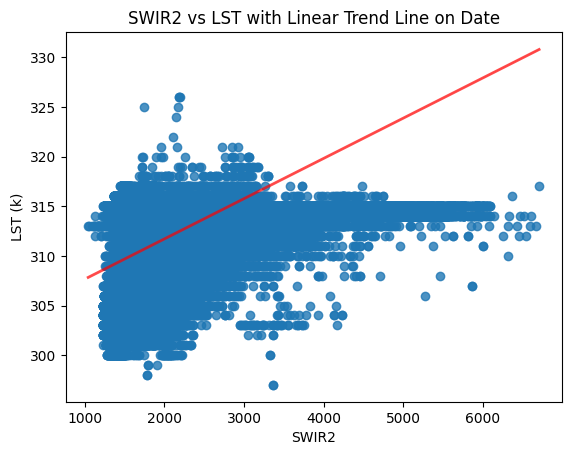

In [20]:
sns.regplot(x=df_filtered['swir2'], y=df_filtered['lst'], line_kws={'color':'r', 'alpha':0.7, 'lw':2})
plt.xlabel('SWIR2')
plt.ylabel('LST (k)')
plt.title('SWIR2 vs LST with Linear Trend Line on Date')
plt.show()

In [21]:
correlation, p_value = stats.spearmanr(df_filtered['swir2'], df_filtered['lst'])
print(f'Spearman correlation coefficient: {correlation}, p-value: {p_value}')

Spearman correlation coefficient: 0.5875707241594762, p-value: 0.0
